In [1]:
%matplotlib inline
import gzip
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_train = 60000
n_test = 10000

In [3]:
def get_data(fname):
    image_size = 28
    f = gzip.open(fname,'r') 
    f.read(16)
    data = f.read()
    data = np.frombuffer(data, dtype=np.uint8).astype(np.float32)
    data = data.reshape(-1, image_size, image_size)
    f.close()
    return data

def get_labels(fname):
    f = gzip.open(fname,'r') 
    f.read(8)
    data = f.read()
    data = np.frombuffer(data, dtype=np.uint8)
    f.close()
    return data

In [4]:
labels = get_labels('t10k-labels-idx1-ubyte.gz')

In [5]:
train_data = get_data('train-images-idx3-ubyte.gz')
test_data = get_data('t10k-images-idx3-ubyte.gz')

In [6]:
test_data.shape

(10000, 28, 28)

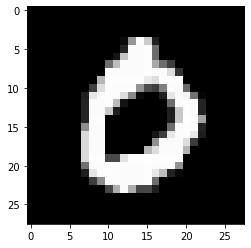

In [7]:
plt.imshow(test_data[3], cmap='gray')

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [9]:
input_img = keras.Input(shape=(28*28,))

h_size = 32
latent_size = 8

h1 = layers.Dense(h_size, activation='relu')(input_img)
encoded = layers.Dense(latent_size, activation='relu')(h1)

h2 = layers.Dense(h_size, activation='relu')(encoded)
decoded = layers.Dense(28*28, activation='sigmoid')(h2)

autoencoder = keras.Model(input_img, decoded)
encoder = keras.Model(input_img, encoded)

In [10]:
encoded_input = keras.Input(shape=(latent_size,))
h2_layer = autoencoder.layers[-2](encoded_input)
decoder_layer = autoencoder.layers[-1](h2_layer)
decoder = keras.Model(encoded_input, decoder_layer)

In [11]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [12]:
# normalise and flatten data
train_data = (train_data/255).reshape((-1,28*28))
test_data = (test_data/255).reshape((-1,28*28))
print(np.max(train_data), np.max(test_data))

1.0 1.0


In [13]:
autoencoder.fit(train_data, train_data,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(test_data, test_data))

Epoch 1/50
235/235 [==============================] - 7s 31ms/step - loss: 0.2901 - val_loss: 0.2105
Epoch 2/50
235/235 [==============================] - 7s 31ms/step - loss: 0.1960 - val_loss: 0.1849
Epoch 3/50
235/235 [==============================] - 6s 26ms/step - loss: 0.1812 - val_loss: 0.1754
Epoch 4/50
235/235 [==============================] - 6s 27ms/step - loss: 0.1743 - val_loss: 0.1706
Epoch 5/50
235/235 [==============================] - 8s 33ms/step - loss: 0.1687 - val_loss: 0.1639
Epoch 6/50
235/235 [==============================] - 7s 30ms/step - loss: 0.1634 - val_loss: 0.1604
Epoch 7/50
235/235 [==============================] - 7s 30ms/step - loss: 0.1606 - val_loss: 0.1579
Epoch 8/50
235/235 [==============================] - 6s 25ms/step - loss: 0.1587 - val_loss: 0.1563
Epoch 9/50
235/235 [==============================] - 7s 28ms/step - loss: 0.1573 - val_loss: 0.1550
Epoch 10/50
235/235 [==============================] - 7s 29ms/step - loss: 0.1561 - val_lo

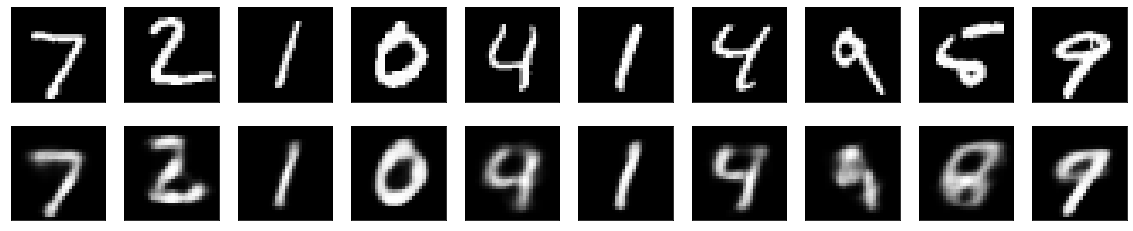

In [14]:
encoded_imgs = encoder.predict(test_data)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_data[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [15]:
x_arr = np.arange(8)
y_arr = np.arange(2, 4)
mesh = np.array(np.meshgrid(x_arr, y_arr))
combinations = mesh.T.reshape(-1, 2)

In [24]:
encoded_imgs.T.shape

(8, 10000)

In [26]:
encoded_imgs.T[6]

array([-0., -0., -0., ..., -0., -0., -0.], dtype=float32)

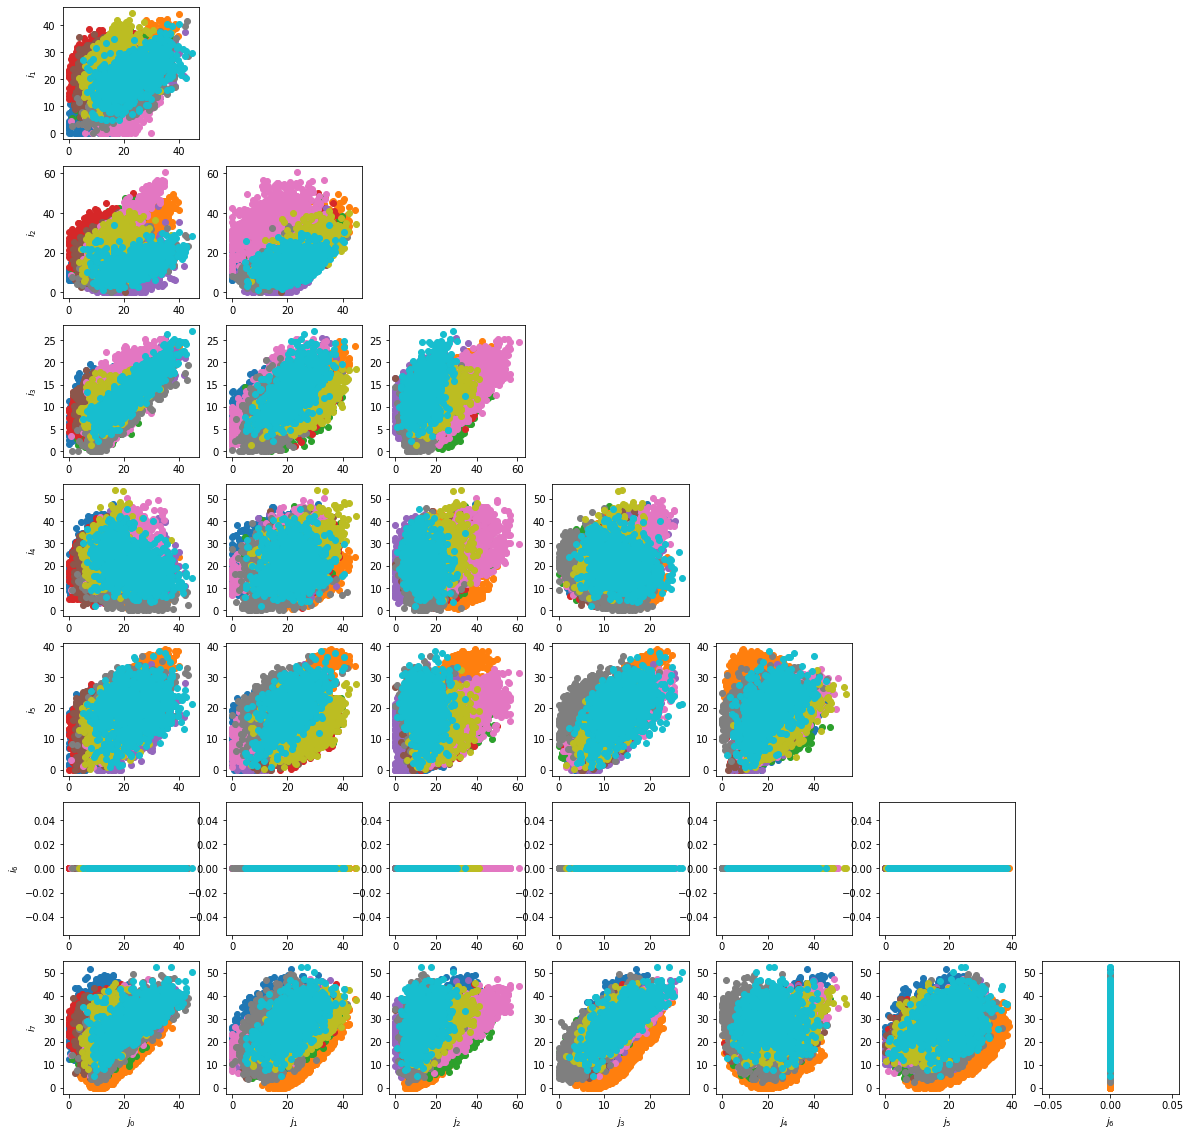

In [42]:
arrs = encoded_imgs.T
fig, axs = plt.subplots(7, 7, figsize=(20, 20))
for i in range(8):
    for j in range(7):
        ax = axs[i-1, j]
        if (j >= i):
            ax.axis('off')
            continue
        ax.axis('on')
        x = arrs[j]
        y = arrs[i]
        for n in range(10):
            k = np.where(labels == n)
            ax.scatter(x[k], y[k], label=n)
        if i == 7:
            ax.set_xlabel(rf"$j_{j}$")
        if j == 0:
            ax.set_ylabel(rf"$i_{i}$")

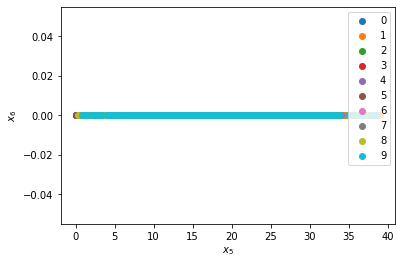

In [43]:
x = arrs[5]
y = arrs[6]
fig, ax = plt.subplots()
for n in range(10):
    i = np.where(labels == n)
    ax.scatter(x[i], y[i], label=n)
ax.set_xlabel(r"$x_5$")
ax.set_ylabel(r"$x_6$")
ax.legend();

In [ ]:
# Save models
autoencoder.save('autoencoder')
encoder.save('encoder')
decoder.save('decoder')

### Part 2

In [ ]:
nx = 25
ny = 25
xs = np.linspace(0, 50, nx)
ys = np.linspace(0, 50, ny)
x5, x6 = np.meshgrid(xs, ys)

In [ ]:
shape = x5.shape
x0 = np.full(shape, 10)
x1 = np.full(shape, 20)
x2 = np.full(shape, 20)
x3 = np.full(shape, 20)
x4 = np.full(shape, 20)
x7 = np.full(shape, 20)

In [ ]:
full_grid = np.stack((x0, x1, x2, x3, x4, x5, x6, x7)).T

In [ ]:
full_grid = full_grid.reshape(nx*ny, 8)

In [ ]:
full_grid.shape

In [ ]:
decoded_grid = decoder.predict(full_grid)

In [ ]:
decoded_grid.shape

In [ ]:
decoded_grid = decoded_grid.reshape((nx, ny, 28, 28))

In [ ]:
decoded_grid.shape

In [ ]:
decoded_grid = decoded_grid.swapaxes(1, 2)

In [ ]:
decoded_grid = decoded_grid.reshape(28*nx, 28*ny)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(decoded_grid)